In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [6]:
Wyniki_rund = pd.read_excel("Wyniki_badania.xlsx", sheet_name="Wyniki szczegółowe", index_col=0)
Wyniki_rund.fillna("", inplace=True)
Wyniki_rund.head()

,Indeks,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Runda,Strategia synkretyczna
0,0,E,D,K,98.04,1,Ż,0.0,100.0,3,,0,EDK
1,1,E,B,K,158.08,1,Ż,100.0,0.0,2,,0,EBK
2,2,P,B,Z,78.14,1,Ż,100.0,0.0,0,,0,PBZ
3,3,A,D,K,80.11,1,Ż,100.0,0.0,1,,0,ADK
4,4,R,B,K,120.02,1,Ż,100.0,0.0,2,,0,RBK


In [8]:
Wyniki_końcowe = pd.read_excel("Wyniki_badania.xlsx", sheet_name="Wyniki końcowe", index_col=0)
Wyniki_końcowe.fillna("", inplace=True)
Wyniki_końcowe.head()

,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Strategia synkretyczna,Potomkowie,Rodzice,Zdrajcy
0,E,D,K,135.40,10,Ż,0.0,100.0,2,,EDK,25 44 50 61 65 86 106,,1 11 13 18 23 24 25 27 28 30 33 36 37 38 40 4...
1,E,B,K,66.44,10,Ż,100.0,0.0,2,,EBK,28 45 77,,0 5 7 8 10 11 14 15 18 21 22 23 24 28 29 3...
2,P,B,Z,-9.75,2,Ś,100.0,0.0,0,W,PBZ,20,,1 4 5 7 11 14 16 18 20 22
3,A,D,K,-0.58,5,Ś,100.0,0.0,0,W,ADK,,,0 1 5 8 10 11 18 21 22 23 24 25 26 28 29 35
4,R,B,K,-2.65,5,Ś,100.0,0.0,2,W,RBK,22,,0 7 8 10 11 15 18 21 23 25 28 29 33 34 36 3...


In [10]:
Wyniki_końcowe[(Wyniki_końcowe["Status"] == "Ś") & (Wyniki_końcowe["Powód śmierci"] == "N")]

,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Strategia synkretyczna,Potomkowie,Rodzice,Zdrajcy


In [12]:
Zakończenie = Wyniki_końcowe[Wyniki_końcowe["Status"] == "Ż"]
Zakończenie

,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Strategia synkretyczna,Potomkowie,Rodzice,Zdrajcy
0,E,D,K,135.40,10,Ż,0.0000,100.0000,2,,EDK,25 44 50 61 65 86 106,,1 11 13 18 23 24 25 27 28 30 33 36 37 38 40 4...
1,E,B,K,66.44,10,Ż,100.0000,0.0000,2,,EBK,28 45 77,,0 5 7 8 10 11 14 15 18 21 22 23 24 28 29 3...
6,K,D,Z,19.27,10,Ż,0.0000,100.0000,1,,KDZ,21 42 49 72,,0 1 7 11 18 26 28 29 30 33 41 44 47 48 50 5...
7,F,B,K,61.65,10,Ż,0.0000,100.0000,1,,FBK,26 37 51 60,,1 2 5 11 13 18 23 25 28 29 36 37 38 44 52 5...
10,P,D,Z,18.76,10,Ż,0.0000,100.0000,2,,PDZ,23 29 35 59,,0 1 3 5 7 11 18 23 24 25 26 29 36 37 38 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,F,D,K,100.00,0,Ż,18.7500,81.2500,2,,FDK,,0 47,
107,F,D,K,100.00,0,Ż,17.1875,82.8125,2,,FDK,,43 79,
108,F,D,Z,100.00,0,Ż,21.8750,78.1250,2,,FDZ,,58 61,
109,F,D,K,100.00,0,Ż,0.0000,100.0000,2,,FDK,,44 49,


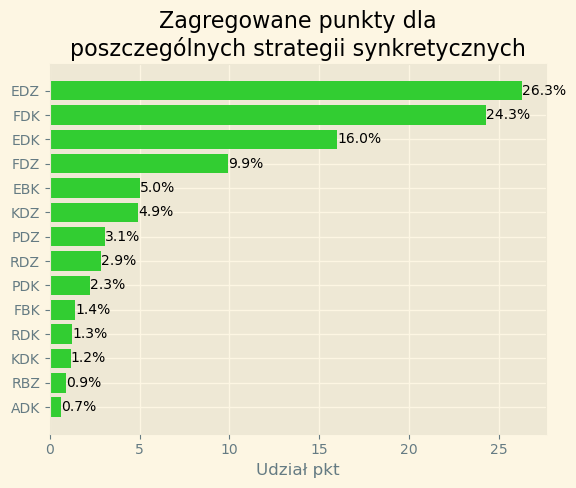

In [58]:
pkt_synt_str = Zakończenie.groupby("Strategia synkretyczna")["Punkty"].sum().sort_values()
s_pkt_str = sum(pkt_synt_str)
pc_synt_str = (pkt_synt_str/s_pkt_str)*100
plt.style.use("Solarize_Light2")
w1=plt.barh(range(len(pc_synt_str)), pc_synt_str, color = "limegreen")
plt.bar_label(w1, fmt = "%.1f%%")
plt.yticks(range(len(pc_synt_str)), pc_synt_str.index)
plt.xlabel("Udział pkt")
plt.title("Zagregowane punkty dla\nposzczególnych strategii synkretycznych")
plt.show()

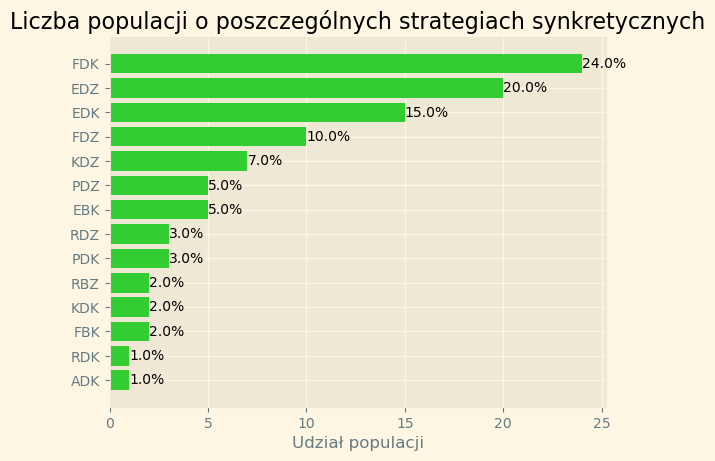

In [59]:
plt.clf()
gr_synt_str = Zakończenie.groupby("Strategia synkretyczna").size().sort_values()
s_gr_str = sum(gr_synt_str)
pc_gr_str = (gr_synt_str/s_gr_str)*100
plt.style.use("Solarize_Light2")
plt.style.use("Solarize_Light2")
w2=plt.barh(range(len(pc_gr_str)), pc_gr_str, color = "limegreen")
plt.bar_label(w2, fmt = "%.1f%%")
plt.yticks(range(len(pc_gr_str)), pc_gr_str.index)
plt.xlabel("Udział populacji")
plt.title("Liczba populacji o poszczególnych strategiach synkretycznych")
plt.show()

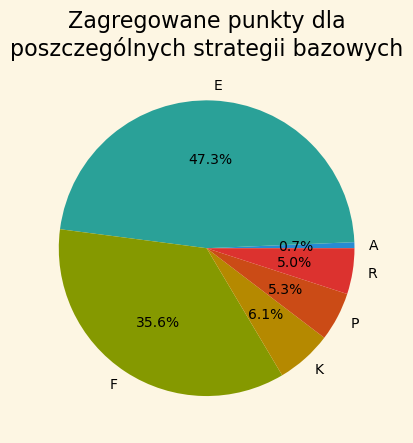

In [62]:
plt.clf()
pkt_strategie = Zakończenie.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie, labels=pkt_strategie.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla\nposzczególnych strategii bazowych")
plt.show()

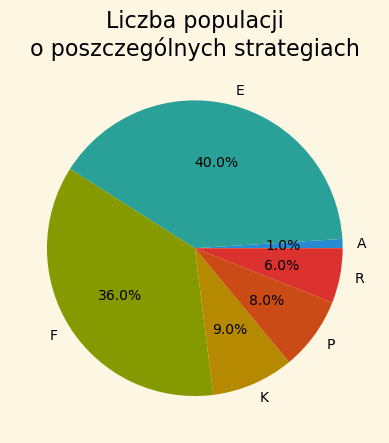

In [63]:
plt.clf()
gr_strategie = Zakończenie.groupby("Strategia bazowa").size()
plt.pie(gr_strategie, labels=gr_strategie.index, autopct="%1.1f%%")
plt.title("Liczba populacji\no poszczególnych strategiach")
plt.show()

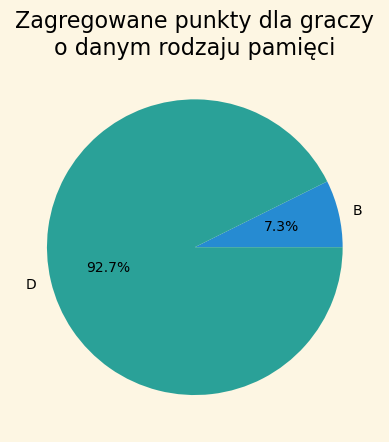

In [64]:
plt.clf()
pkt_pamięć = Zakończenie.groupby("Pamięć")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_pamięć, labels=pkt_pamięć.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla graczy\no danym rodzaju pamięci")
plt.show()

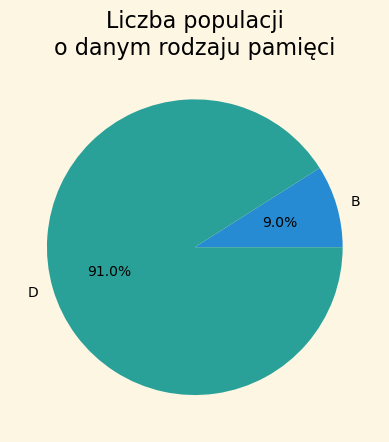

In [65]:
plt.clf()
gr_pamięć = Zakończenie.groupby("Pamięć").size()
plt.style.use("Solarize_Light2")
plt.pie(gr_pamięć, labels=gr_pamięć.index, autopct="%1.1f%%")
plt.title("Liczba populacji\no danym rodzaju pamięci")
plt.show()

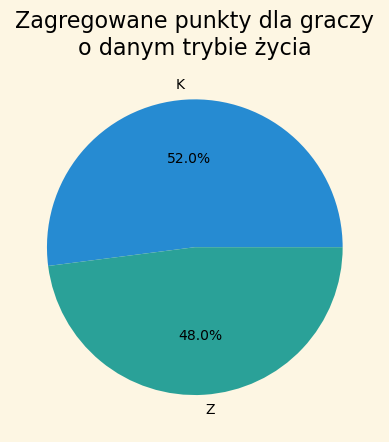

In [66]:
plt.clf()
pkt_tryb = Zakończenie.groupby("Tryb życia")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_tryb, labels=pkt_tryb.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla graczy\no danym trybie życia")
plt.show()

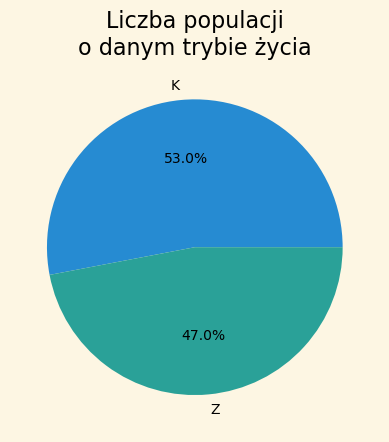

In [67]:
plt.clf()
gr_tryb = Zakończenie.groupby("Tryb życia").size()
plt.style.use("Solarize_Light2")
plt.pie(gr_tryb, labels=gr_tryb.index, autopct="%1.1f%%")
plt.title("Liczba populacji\no danym trybie życia")
plt.show()

In [18]:
zmiany = Wyniki_rund[Wyniki_rund["Status"] == "Ż"]
zmiany

,Indeks,Strategia bazowa,Pamięć,Tryb życia,Punkty,Wiek,Status,Fenotyp A,Fenotyp B,Lokalizacja,Powód śmierci,Runda,Strategia synkretyczna
0,0,E,D,K,98.04,1,Ż,0.0000,100.0000,3,,0,EDK
1,1,E,B,K,158.08,1,Ż,100.0000,0.0000,2,,0,EBK
2,2,P,B,Z,78.14,1,Ż,100.0000,0.0000,0,,0,PBZ
3,3,A,D,K,80.11,1,Ż,100.0000,0.0000,1,,0,ADK
4,4,R,B,K,120.02,1,Ż,100.0000,0.0000,2,,0,RBK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,106,F,D,K,100.00,0,Ż,18.7500,81.2500,2,,10,FDK
591,107,F,D,K,100.00,0,Ż,17.1875,82.8125,2,,10,FDK
592,108,F,D,Z,100.00,0,Ż,21.8750,78.1250,2,,10,FDZ
593,109,F,D,K,100.00,0,Ż,0.0000,100.0000,2,,10,FDK


In [25]:
zmiany_k = zmiany[zmiany["Strategia bazowa"] == "K"].groupby("Runda")["Punkty"].sum()
zmiany_e = zmiany[zmiany["Strategia bazowa"] == "E"].groupby("Runda")["Punkty"].sum()
zmiany_p = zmiany[zmiany["Strategia bazowa"] == "P"].groupby("Runda")["Punkty"].sum()
zmiany_r = zmiany[zmiany["Strategia bazowa"] == "R"].groupby("Runda")["Punkty"].sum()
zmiany_f = zmiany[zmiany["Strategia bazowa"] == "F"].groupby("Runda")["Punkty"].sum()
zmiany_a = zmiany[zmiany["Strategia bazowa"] == "A"].groupby("Runda")["Punkty"].sum()

In [39]:
zmiany_k = zmiany_k.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_e = zmiany_e.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_p = zmiany_p.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_r = zmiany_r.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_f = zmiany_f.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_a = zmiany_a.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)

In [40]:
suma = [sum(x) for x in zip(zmiany_k, zmiany_e, zmiany_p, zmiany_r, zmiany_f, zmiany_a)]
procent_zmiany_k = [100 * x / suma[i] for i, x in enumerate(zmiany_k)]
procent_zmiany_e = [100 * x / suma[i] for i, x in enumerate(zmiany_e)]
procent_zmiany_p = [100 * x / suma[i] for i, x in enumerate(zmiany_p)]
procent_zmiany_r = [100 * x / suma[i] for i, x in enumerate(zmiany_r)]
procent_zmiany_f = [100 * x / suma[i] for i, x in enumerate(zmiany_f)]
procent_zmiany_a = [100 * x / suma[i] for i, x in enumerate(zmiany_a)]

In [88]:
r_min = min(zmiany["Runda"])
r_max = max(zmiany["Runda"])

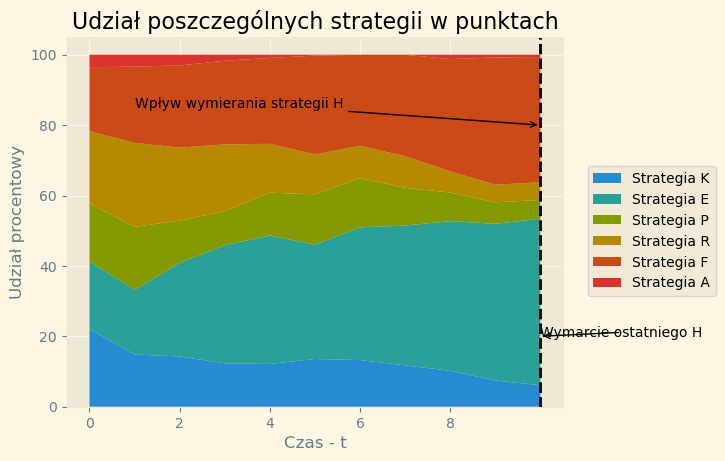

In [89]:
plt.clf()
plt.style.use("Solarize_Light2")
plt.stackplot(range(r_max+1),
                    procent_zmiany_k, procent_zmiany_e, procent_zmiany_p, procent_zmiany_r, procent_zmiany_f, procent_zmiany_a,
              labels=["Strategia K", "Strategia E", "Strategia P", "Strategia R", "Strategia F", "Strategia A"])
plt.legend(loc=[1.05,0.3])
plt.xlabel("Czas - t")
plt.xticks(range(r_min, r_max, 2))
plt.axvline(x=10, color = "black", linestyle = "--")
plt.axvline(x=10, color = "black", linestyle = ":")
plt.annotate("Wpływ wymierania strategii H", xy=(10, 80), xytext=(1, 85),
             arrowprops=dict(arrowstyle="->"))
plt.annotate("Wymarcie ostatniego H", xy=(10, 20), xytext=(10, 20),
             arrowprops=dict(arrowstyle="->"))
plt.ylabel("Udział procentowy")
plt.title("Udział poszczególnych strategii w punktach")
plt.show()

In [68]:
zmiany_zak = zmiany[zmiany["Tryb życia"] == "Z"].groupby("Runda")["Punkty"].sum()
zmiany_koc = zmiany[zmiany["Tryb życia"] == "K"].groupby("Runda")["Punkty"].sum()

In [69]:
zmiany_zak = zmiany_zak.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)
zmiany_koc = zmiany_koc.reindex(range(min(zmiany["Runda"]), max(zmiany["Runda"]) + 1), fill_value=0)

In [70]:
suma = [sum(x) for x in zip(zmiany_zak, zmiany_koc)]
procent_zmiany_zak = [100 * x / suma[i] for i, x in enumerate(zmiany_zak)]
procent_zmiany_koc = [100 * x / suma[i] for i, x in enumerate(zmiany_koc)]

In [81]:
kum = procent_zmiany_zak.index(max(procent_zmiany_zak))
pop = zmiany.groupby("Runda")["Indeks"].count()

<Figure size 640x480 with 0 Axes>

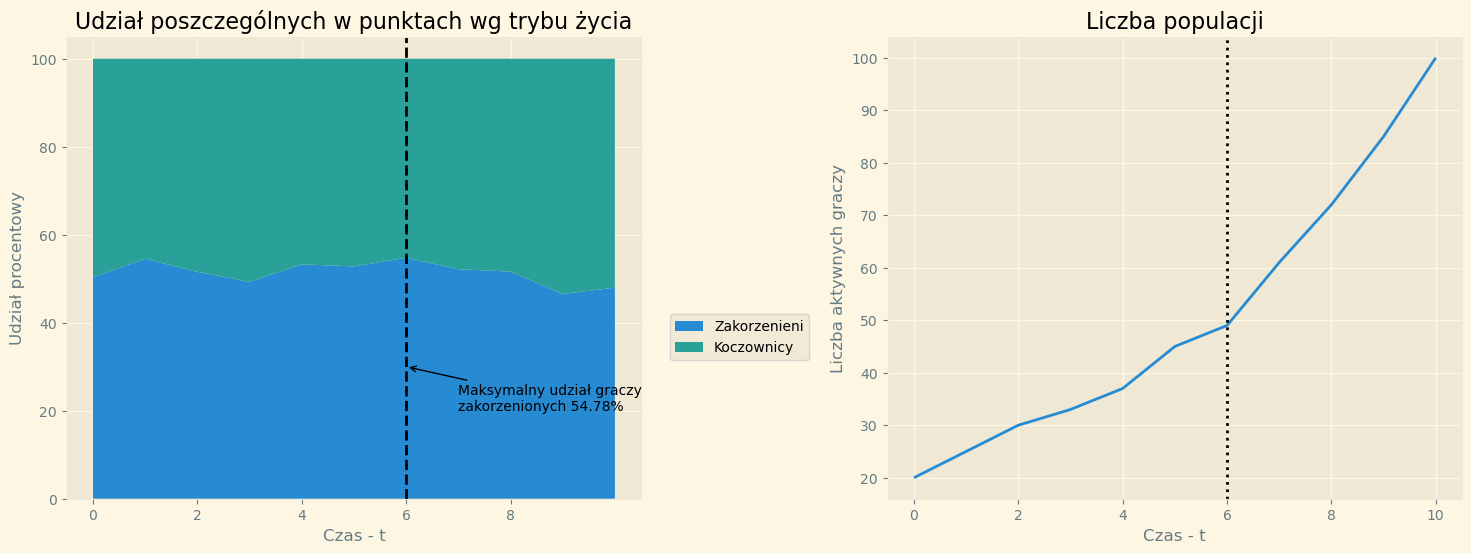

In [90]:
#Wykres 1
plt.clf()
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.style.use("Solarize_Light2")
plt.stackplot(range(r_max+1), procent_zmiany_zak, procent_zmiany_koc,
              labels=["Zakorzenieni","Koczownicy"])
plt.legend(loc=[1.05,0.3])
plt.xlabel("Czas - t")
plt.xticks(range(0, r_max, 2))
plt.axvline(x=kum, color = "black", linestyle = "--")
plt.annotate(f"Maksymalny udział graczy\nzakorzenionych {round(procent_zmiany_zak[kum], 2)}%",
             xy=(kum, 30), xytext=(7, 20),
             arrowprops=dict(arrowstyle="->"))
plt.ylabel("Udział procentowy")
plt.title("Udział poszczególnych w punktach wg trybu życia")

#Wykres 2
plt.subplot(1,2,2)
plt.style.use("Solarize_Light2")
plt.plot(range(r_max+1), pop)
plt.ylabel("Liczba aktywnych graczy")
plt.xlabel("Czas - t")
plt.axvline(x=kum, color = "black", linestyle = ":")
plt.annotate(f"Liczba populacji {pop[kum]}", xy=(kum, 800), xytext=(7, 700),
             arrowprops=dict(arrowstyle="->"))
plt.title("Liczba populacji")

plt.subplots_adjust(wspace=0.43)
plt.show()

#### Dane dla poszczególnych lokalizacji:

<Figure size 640x480 with 0 Axes>

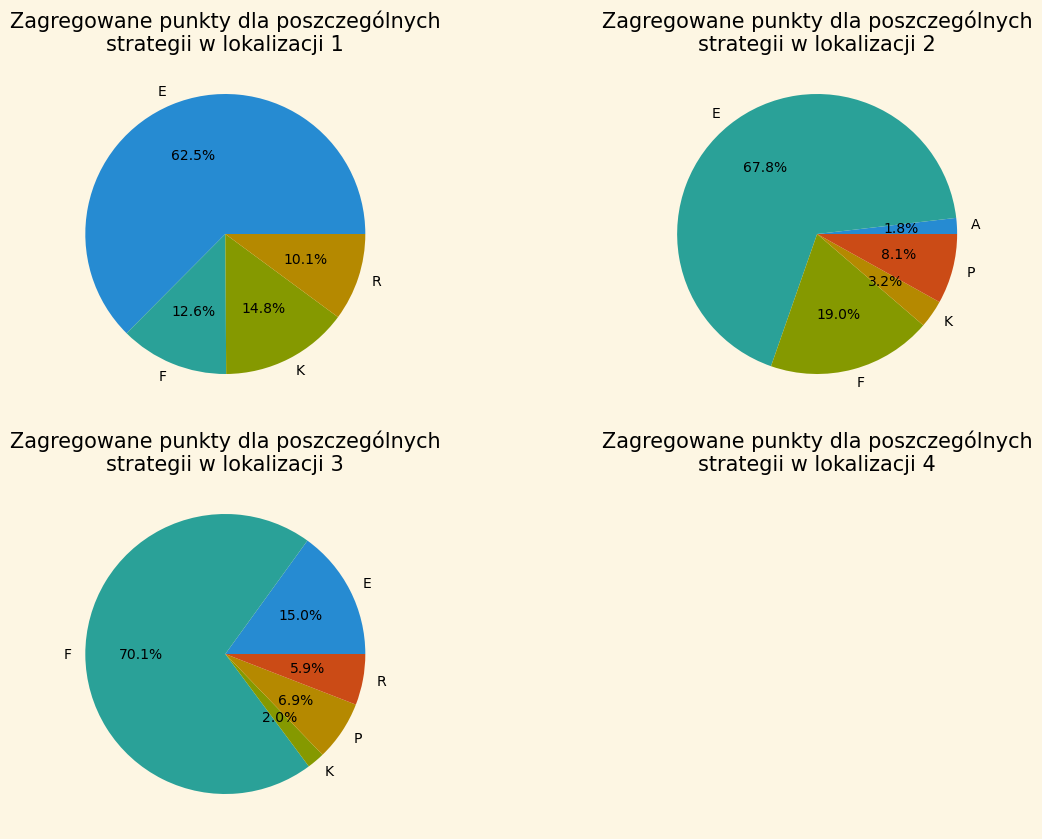

In [93]:
plt.clf()
plt.figure(figsize = (14,10))
#Wykres dla lokalizacji 1
plt.subplot(2,2,1)
pkt_strategie_1 = Zakończenie[Zakończenie["Lokalizacja"] == 0]
pkt_strategie_1 = pkt_strategie_1.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie_1, labels=pkt_strategie_1.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla poszczególnych\nstrategii w lokalizacji 1", fontsize = 15)
#Wykres dla lokalizacji 2
plt.subplot(2,2,2)
pkt_strategie_2 = Zakończenie[Zakończenie["Lokalizacja"] == 1]
pkt_strategie_2 = pkt_strategie_2.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie_2, labels=pkt_strategie_2.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla poszczególnych\nstrategii w lokalizacji 2", fontsize = 15)
#Wykres dla lokalizacji 3
plt.subplot(2,2,3)
pkt_strategie_3 = Zakończenie[Zakończenie["Lokalizacja"] == 2]
pkt_strategie_3 = pkt_strategie_3.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie_3, labels=pkt_strategie_3.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla poszczególnych\nstrategii w lokalizacji 3", fontsize = 15)
#Wykres dla lokalizacji 4
plt.subplot(2,2,4)
pkt_strategie_4 = Zakończenie[Zakończenie["Lokalizacja"] == 3]
pkt_strategie_4 = pkt_strategie_4.groupby("Strategia bazowa")["Punkty"].sum()
plt.style.use("Solarize_Light2")
plt.pie(pkt_strategie_4, labels=pkt_strategie_4.index, autopct="%1.1f%%")
plt.title("Zagregowane punkty dla poszczególnych\nstrategii w lokalizacji 4", fontsize = 15)
plt.show()

In [96]:
#Dla lokalizacji 2
zmiany_2 = zmiany[zmiany["Lokalizacja"] == 2]

In [97]:
zmiany_k_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "K"].groupby("Runda")["Punkty"].sum()
zmiany_e_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "E"].groupby("Runda")["Punkty"].sum()
zmiany_p_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "P"].groupby("Runda")["Punkty"].sum()
zmiany_r_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "R"].groupby("Runda")["Punkty"].sum()
zmiany_f_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "F"].groupby("Runda")["Punkty"].sum()
zmiany_a_2 = zmiany_2[zmiany_2["Strategia bazowa"] == "A"].groupby("Runda")["Punkty"].sum()

In [98]:
zmiany_k_2 = zmiany_k_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_e_2 = zmiany_e_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_p_2 = zmiany_p_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_r_2 = zmiany_r_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_f_2 = zmiany_f_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)
zmiany_a_2 = zmiany_a_2.reindex(range(min(zmiany_2["Runda"]), max(zmiany_2["Runda"]) + 1), fill_value=0)

In [99]:
suma_2 = [sum(x) for x in zip(zmiany_k_2, zmiany_e_2, zmiany_p_2, zmiany_r_2, zmiany_f_2, zmiany_a_2)]
procent_zmiany_k_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_k_2)]
procent_zmiany_e_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_e_2)]
procent_zmiany_p_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_p_2)]
procent_zmiany_r_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_r_2)]
procent_zmiany_f_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_f_2)]
procent_zmiany_a_2 = [100 * x / suma_2[i] for i, x in enumerate(zmiany_a_2)]

<Figure size 640x480 with 0 Axes>

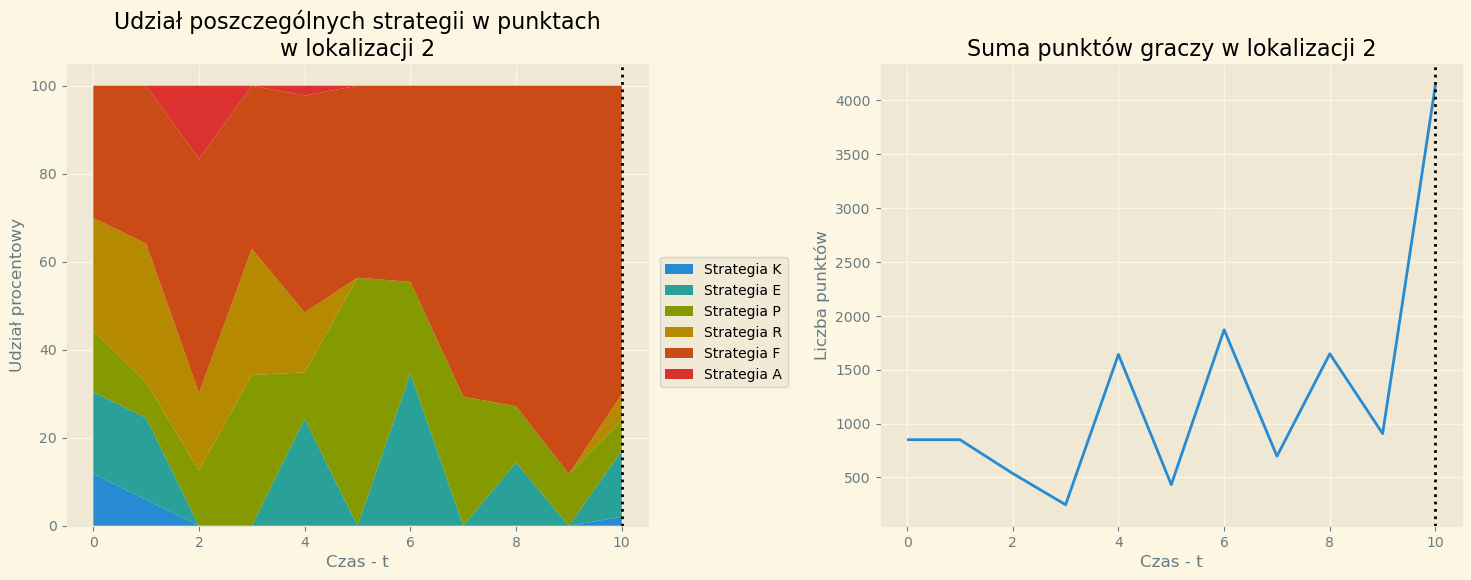

In [101]:
plt.clf()
plt.figure(figsize = (18,6))
#Wykres 1
plt.subplot(1,2,1)
plt.style.use("Solarize_Light2")
plt.stackplot(range(r_max+1), procent_zmiany_k_2, procent_zmiany_e_2, procent_zmiany_p_2, procent_zmiany_r_2, procent_zmiany_f_2, procent_zmiany_a_2,
              labels=["Strategia K","Strategia E", "Strategia P", "Strategia R", "Strategia F", "Strategia A"])
plt.legend(loc=[1.02,0.3])
plt.xlabel("Czas - t")
plt.xticks(range(0, r_max+1, 2))
plt.axvline(x=10, color = "black", linestyle = ":")
plt.annotate("Wymarcie ostatniego gracza\nnie mającego strategi E", xy=(16, 20), xytext=(17, 20),
             arrowprops=dict(arrowstyle="->"))
plt.ylabel("Udział procentowy")
plt.title("Udział poszczególnych strategii w punktach\nw lokalizacji 2")
#Wykres 2
plt.subplot(1,2,2)
plt.style.use("Solarize_Light2")
plt.plot(range(r_max+1), suma_2)
plt.ylabel("Liczba punktów")
plt.xlabel("Czas - t")
plt.axvline(x=10, color = "black", linestyle = ":")
plt.title("Suma punktów graczy w lokalizacji 2")

plt.subplots_adjust(wspace=0.4)
plt.show()